In [1]:
import numpy as np
import pandas as pd
import seaborn as mami
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

%matplotlib inline

# Визуализация данных

In [2]:
rare = pd.read_csv('C1_result.csv')
rare.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth,year,month,day,hour,category_travel_time
0,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,0,10.555556,4.444444,7.5,0.29,0.0,0.0,2016,3,14,17,2.0
1,1,2016-03-14 14:05:39,1,-73.975090,40.758766,-73.953201,40.765068,0,10.555556,4.444444,7.5,0.29,0.0,0.0,2016,3,14,14,4.0
2,1,2016-03-14 15:04:38,1,-73.994484,40.745087,-73.998993,40.722710,0,10.555556,4.444444,7.5,0.29,0.0,0.0,2016,3,14,15,3.0
3,2,2016-03-14 04:24:36,3,-73.944359,40.714489,-73.910530,40.709492,0,10.555556,4.444444,7.5,0.29,0.0,0.0,2016,3,14,4,3.0
4,2,2016-03-14 14:57:56,1,-73.952881,40.766468,-73.978630,40.761921,0,10.555556,4.444444,7.5,0.29,0.0,0.0,2016,3,14,15,4.0


In [3]:
rare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964658 entries, 0 to 964657
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vendor_id             964658 non-null  int64  
 1   pickup_datetime       964658 non-null  object 
 2   passenger_count       964658 non-null  int64  
 3   pickup_longitude      964658 non-null  float64
 4   pickup_latitude       964658 non-null  float64
 5   dropoff_longitude     964658 non-null  float64
 6   dropoff_latitude      964658 non-null  float64
 7   store_and_fwd_flag    964658 non-null  int64  
 8   maximum temperature   964658 non-null  float64
 9   minimum temperature   964658 non-null  float64
 10  average temperature   964658 non-null  float64
 11  precipitation         964658 non-null  float64
 12  snow fall             964658 non-null  float64
 13  snow depth            964658 non-null  float64
 14  year                  964658 non-null  int64  
 15  

### Конвертируем тип данных столбца в category_travel_time, где в дальнейшем будет работать в нём

In [4]:
rare['category_travel_time'] = rare['category_travel_time'].astype('category')

## Корреляция

<AxesSubplot:>

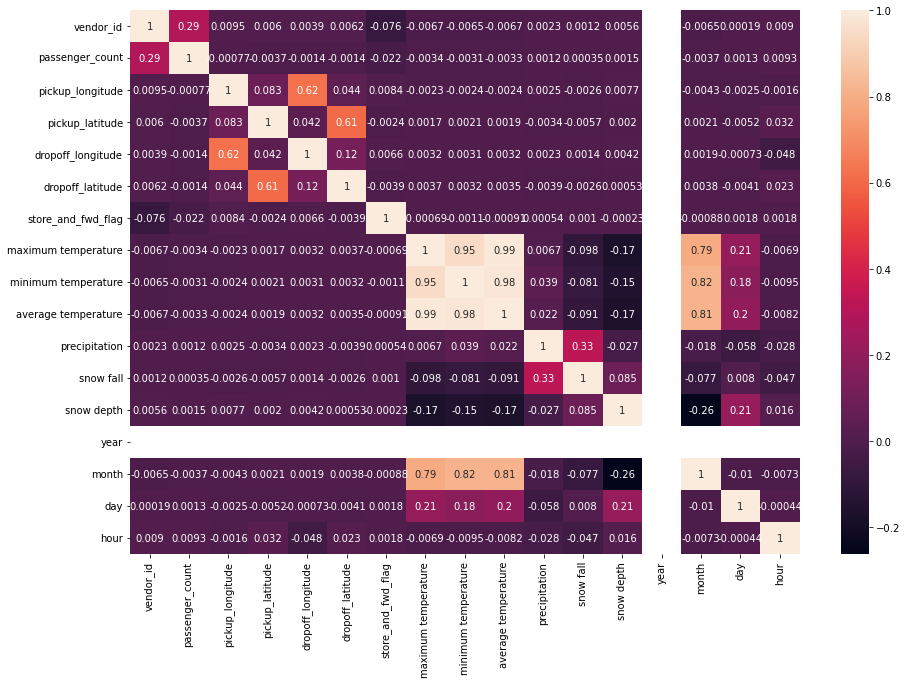

In [5]:
plt.figure(figsize=(15, 10))

mami.heatmap(rare.corr(), annot=True)

### Удаляем колинеарные признаки

In [6]:
rare.drop(['maximum temperature','minimum temperature'], axis=1, inplace=True)

## Графики зависимостей аттрибутов на целевую переменную

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

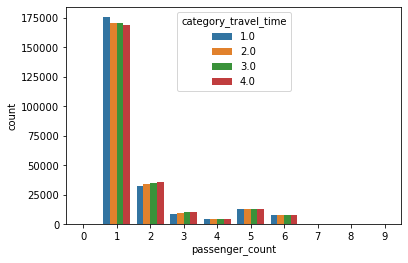

In [7]:
mami.countplot(x='passenger_count', data = rare, hue = 'category_travel_time')

# Разбиение набора данных

In [8]:
rate = rare.drop(['pickup_datetime', 'pickup_latitude','pickup_longitude', 'dropoff_longitude','dropoff_latitude'], axis = 1)

In [9]:
X = rare.drop(['category_travel_time'], axis = 1)
y = rare['category_travel_time']

In [10]:
from sklearn.model_selection import train_test_split

### Разделим данные на тестовые и обучающую выборки

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Классификация исходных компетенций

### Взяли 3 метода, являются самыми распространёнными методами
1. Логистическая Регрессия
2. Ближайших Соседей
3. Множество деревьев

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [13]:
lr = LogisticRegression()

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)

In [15]:
rfc = RandomForestClassifier()

# Обучение моделей

#### Обучим выбранные модели, затем оценим

In [16]:
%%time
lr.fit(X_train, y_train)

ValueError: could not convert string to float: '2016-03-03 17:13:52'

In [17]:
%%time
knn.fit(X_train, y_train)

ValueError: could not convert string to float: '2016-03-03 17:13:52'

In [18]:
%%time
rfc.fit(X_train, y_train)

ValueError: could not convert string to float: '2016-03-03 17:13:52'

In [19]:
lr_pred = lr.predict(X_test)

ValueError: could not convert string to float: '2016-04-16 22:59:25'

In [ ]:
knn_pred = knn.predict(X_test)

In [ ]:
rfc_pred = rfc.predict(X_test)

# Оценка качества моделей

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
print(classification_report(y_test, lr_pred))

In [ ]:
print(classification_report(y_test, knn_pred))

In [ ]:
print(classification_report(y_test, rfc_pred))

In [ ]:
print(accuracy_score(lr_pred, y_test))

In [ ]:
print(accuracy_score(knn_pred, y_test))

In [ ]:
print(accuracy_score(rfc_pred, y_test))